In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from joblib import load, dump

%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print('Shape: ', train.shape)
train.head()

Shape:  (54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
print('Shape: ', test.shape)
test.head()

Shape:  (23490, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


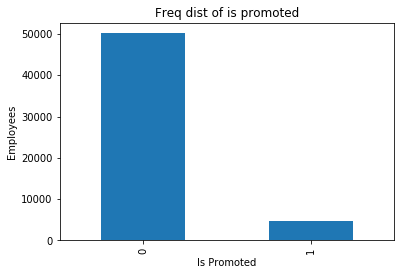

In [8]:
train['is_promoted'].value_counts().plot.bar(title='Freq dist of is promoted')
plt.xlabel('Is Promoted')
plt.ylabel('Employees')
plt.show()

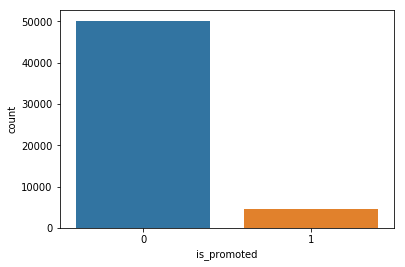

In [9]:
sns.countplot(train['is_promoted'])
plt.show()

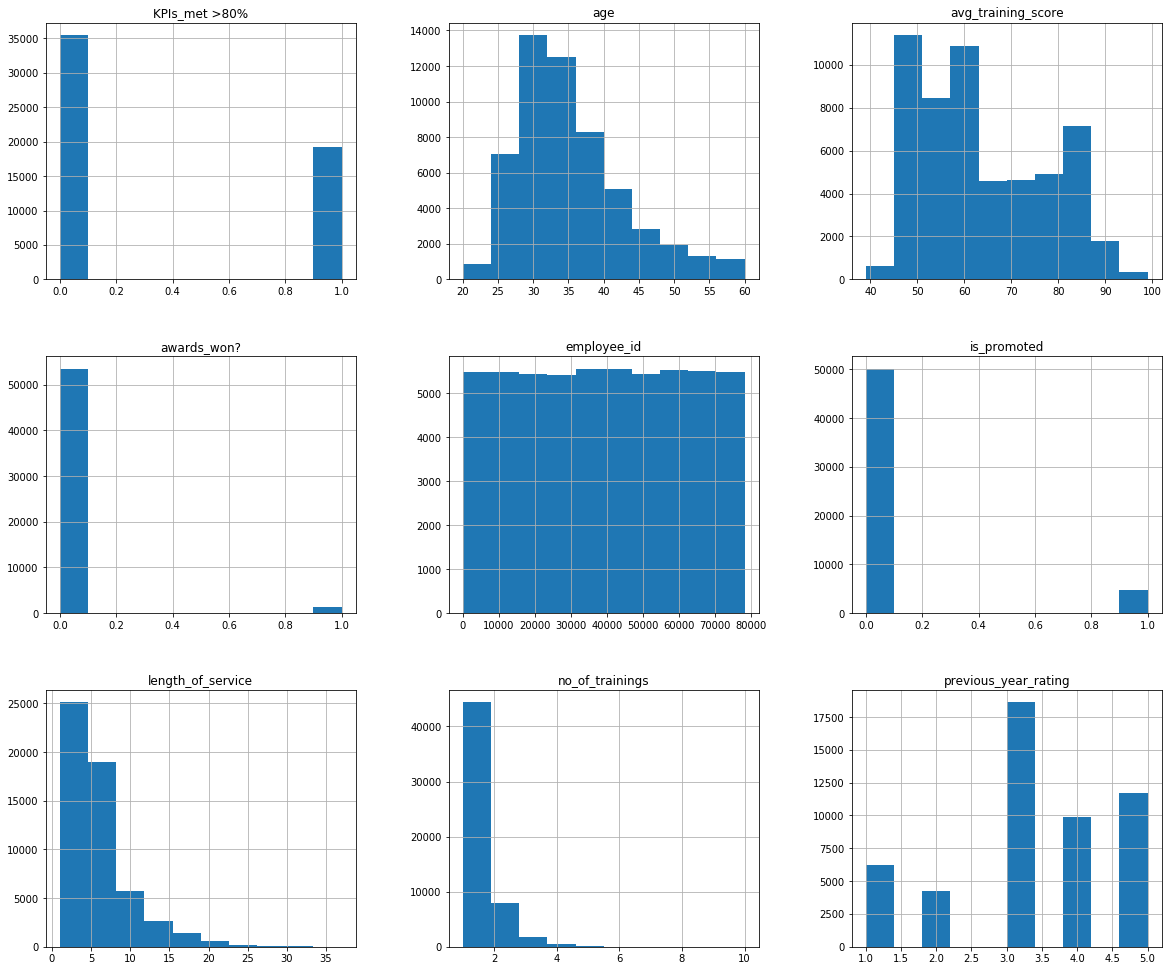

In [10]:
train.hist(figsize=(20,17))
plt.show()

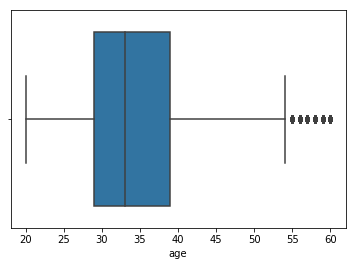

In [11]:
sns.boxplot(train['age'])

In [12]:
train.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [13]:
Q1 = 29
Q3 = 39
IQR = Q3 - Q1
IQR

10

In [14]:
minout = Q1 - 1.5*IQR
minout

14.0

In [15]:
maxout = Q3 + 1.5*IQR
maxout

54.0

In [16]:
# Findind the index of outlier
yindex=np.where(train['age'] > 54)
yindex
yindex2 = np.where(train['age'] < 14)

In [17]:
yindex = list(yindex)
type(yindex)

list

In [18]:
# [train.drop(train.index[i], inplace=True) for i in yindex2]
for i in yindex:
    train.drop(train.index[i], inplace=True)

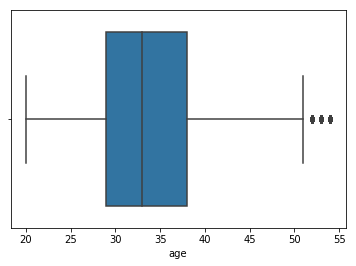

In [19]:
sns.boxplot(train['age'])

In [20]:
train.shape

(53373, 14)

In [21]:
train.groupby('department').is_promoted.value_counts()

department         is_promoted
Analytics          0               4801
                   1                503
Finance            0               2299
                   1                204
HR                 0               2183
                   1                131
Legal              0                959
                   1                 50
Operations         0              10048
                   1               1004
Procurement        0               6193
                   1                670
R&D                0                930
                   1                 69
Sales & Marketing  0              15234
                   1               1194
Technology         0               6149
                   1                752
Name: is_promoted, dtype: int64

In [22]:
pd.crosstab(train['department'], train['is_promoted'], margins=True)

is_promoted,0,1,All
department,,,
Analytics,4801,503,5304
Finance,2299,204,2503
HR,2183,131,2314
Legal,959,50,1009
Operations,10048,1004,11052
Procurement,6193,670,6863
R&D,930,69,999
Sales & Marketing,15234,1194,16428
Technology,6149,752,6901


In [23]:
pd.crosstab(train['department'], train['is_promoted'], normalize='index')

is_promoted,0,1
department,,
Analytics,0.905166,0.094834
Finance,0.918498,0.081502
HR,0.943388,0.056612
Legal,0.950446,0.049554
Operations,0.909157,0.090843
Procurement,0.902375,0.097625
R&D,0.930931,0.069069
Sales & Marketing,0.927319,0.072681
Technology,0.891030,0.108970


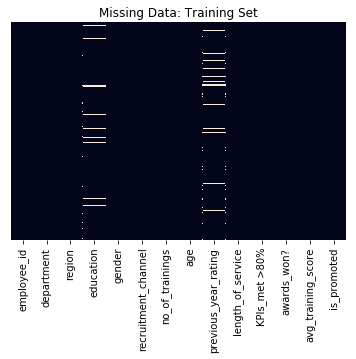

In [24]:
# Heatmap
sns.heatmap(train.isnull(),yticklabels = False, cbar = False)
plt.title('Missing Data: Training Set')
plt.show()

In [26]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

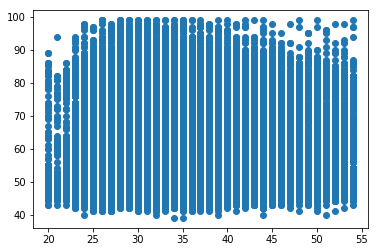

In [27]:
plt.scatter(train['age'], train['avg_training_score'])

In [28]:
train.drop(['employee_id', 'region'], axis=1, inplace=True)
test.drop(['employee_id', 'region'], axis=1, inplace=True)
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [29]:
train.isnull().sum()

department                 0
education               2375
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [30]:
train['education'].fillna(train['education'].mode()[0], inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(), inplace=True)
test['education'].fillna(test['education'].mode()[0], inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].mean(), inplace=True)

In [31]:
train.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [32]:
cols = train.select_dtypes('object').columns
train = pd.get_dummies(train, columns=cols, drop_first=True)
cols = test.select_dtypes('object').columns
test = pd.get_dummies(test, columns=cols, drop_first=True)

In [33]:
train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [34]:
train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
count,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,...,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.000000,53373.00000,53373.000000
mean,1.255710,34.199089,3.330240,5.657954,0.353437,0.023251,63.405186,0.085755,0.046896,0.043355,...,0.207071,0.128586,0.018717,0.307796,0.129298,0.015083,0.266258,0.704663,0.02119,0.424241
std,0.610558,6.797276,1.210565,3.914476,0.478041,0.150703,13.396510,0.280005,0.211419,0.203657,...,0.405211,0.334744,0.135526,0.461586,0.335532,0.121882,0.442005,0.456198,0.14402,0.494232
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
75%,1.000000,38.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000
max,10.000000,54.000000,5.000000,33.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [35]:
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

# Splittig the data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
X = sc.fit_transform(X)
test = sc.transform(test)

# UnderSampling

In [40]:
from sklearn.utils import resample

y = train['is_promoted']
X = train.drop('is_promoted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

X1 = pd.concat([X_train, y_train], axis=1)

not_promoted = X1[X1["is_promoted"]==0]
promoted = X1[X1["is_promoted"]==1]

In [41]:
not_promoted_downsampled = resample(not_promoted,
                                replace = False, 
                                n_samples = len(promoted), 
                                random_state = 27) 

downsampled = pd.concat([not_promoted_downsampled, promoted])

downsampled.is_promoted.value_counts()

1    3444
0    3444
Name: is_promoted, dtype: int64

In [42]:
X_train = downsampled.drop('is_promoted', axis=1)
y_train = downsampled['is_promoted']

# Logistic Regression

In [44]:
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     12211
           1       0.23      0.81      0.36      1133

    accuracy                           0.75     13344
   macro avg       0.60      0.78      0.60     13344
weighted avg       0.91      0.75      0.81     13344



# Decision Tree

In [47]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [49]:
y_pred = dt.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     12211
           1       0.22      0.75      0.35      1133

    accuracy                           0.76     13344
   macro avg       0.60      0.75      0.60     13344
weighted avg       0.91      0.76      0.81     13344



# Random Forest

In [51]:
rf = RandomForestClassifier().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
y_pred = rf.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     12211
           1       0.24      0.77      0.37      1133

    accuracy                           0.77     13344
   macro avg       0.61      0.77      0.61     13344
weighted avg       0.91      0.77      0.82     13344

